In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import skopt
from skopt import plots
sns.set(color_codes=True, font_scale=1.2)

sys.path.append('../../src')
import raybay

In [2]:
# Load treatment plan results
approved = np.load('approved/res.pkl', allow_pickle=True)
default = np.load('default/res.pkl', allow_pickle=True)

In [3]:
default.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,ChestWall,MaxDvh,AtMost,3000,1.94
1,D2cm,MaxDose,AtMost,3000,NaN
2,Esophagus,MaxDvh,AtMost,1880,19.97
3,Lung_Total-GTV,MaxDvh,AtMost,1160,56.63
4,Lung_Total-GTV,MaxDvh,AtMost,1240,37.76
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Ribs,MaxDvh,AtMost,3200,2.13
8,Ribs,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,1.99


In [4]:
default.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,ChestWall,MaxDvh,3000,1.94,NaN,1
1,D2cm,MaxDose,3000,0.00,NaN,1
2,Esophagus,MaxDvh,1880,19.97,NaN,1
3,Lung_Total-GTV,MaxDvh,1160,56.63,NaN,1
4,Lung_Total-GTV,MaxDvh,1240,37.76,NaN,1
5,PTV,MinDvh,4800,95.00,NaN,1
6,PTV,MaxDose,8000,0.00,NaN,1
7,Ribs,MaxDvh,3200,2.13,NaN,1
8,Ribs,MaxDose,4000,0.00,NaN,1
9,SpinalCanal,MaxDvh,1360,1.99,NaN,1


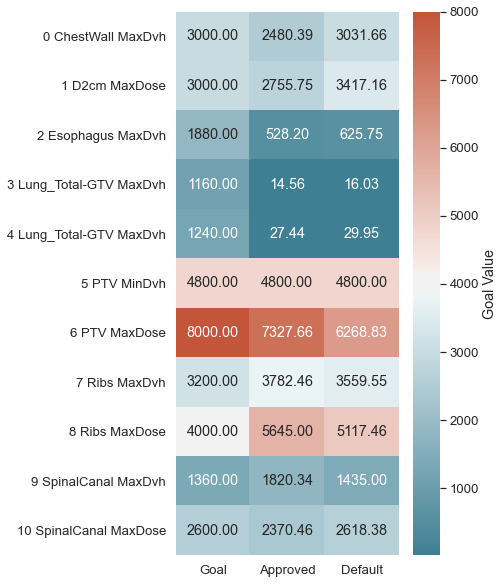

In [9]:
# Compare goal values
X = np.zeros((len(approved.goal_df), 3))
roi_dict = {
    f"{index} {row['Roi']} {row['Type']}": index for index, row in approved.goal_df.iterrows()
}
for index, row in approved.goal_df.iterrows():
    X[index, 0] = row['AcceptanceLevel']
    X[index, 1] = approved.goal_dict[index][0]
    X[index, 2] = default.goal_dict[index][0]
Y = pd.DataFrame(columns=['Goal', 'Approved', 'Default'], data=X, index=roi_dict)
f, ax = plt.subplots(1, figsize=(5, 10))
sns.heatmap(Y, annot=True, cmap=sns.diverging_palette(220, 20, n=256), ax=ax, cbar_kws={'label': 'Goal Value'},
            fmt=".2f");

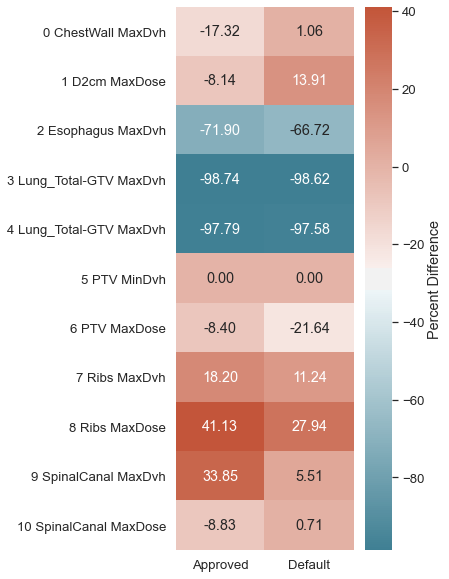

In [10]:
# Compare goal percent difference
X = np.zeros((len(approved.goal_df), 2))
for index, row in approved.goal_df.iterrows():
    X[index, 0] = -raybay.get_term(approved.goal_dict[index][0], row['AcceptanceLevel'], 'Max', 'linear')
    X[index, 1] = -raybay.get_term(default.goal_dict[index][0], row['AcceptanceLevel'], 'Max', 'linear')
Y = pd.DataFrame(columns=['Approved', 'Default'], data=X, index=roi_dict)
f, ax = plt.subplots(1, figsize=(4, 10))
sns.heatmap(Y, annot=True, cmap=sns.diverging_palette(220, 20, n=256), ax=ax, cbar_kws={'label': 'Percent Difference'},
            fmt='.2f');

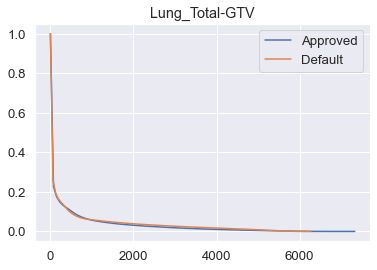

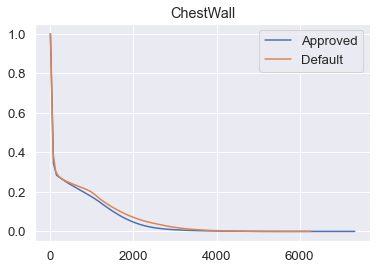

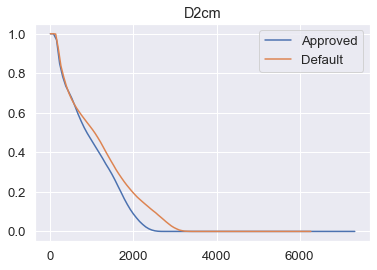

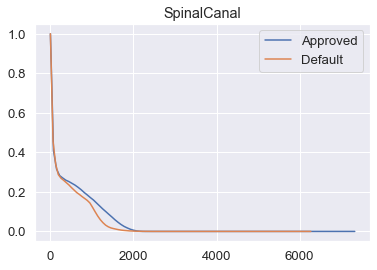

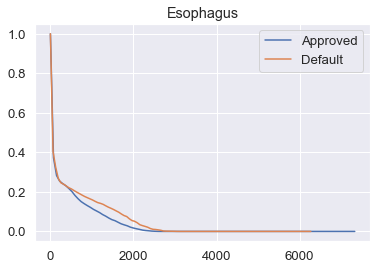

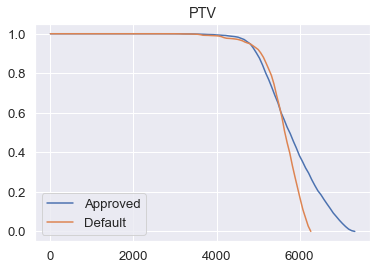

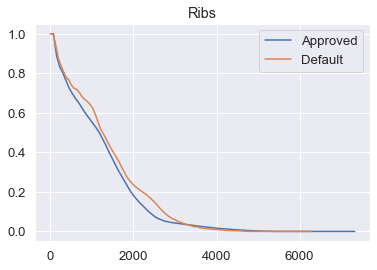

In [11]:
for roi in approved.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.title(roi)
    plt.legend(['Approved', 'Default'])